In [1]:
import os

In [2]:
!git clone https://github.com/Adibuoy23/meaning_map.git

Cloning into 'meaning_map'...
remote: Enumerating objects: 162, done.
remote: Counting objects: 100% (162/162), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 162 (delta 65), reused 132 (delta 38), pack-reused 0
Receiving objects: 100% (162/162), 345.10 KiB | 1.40 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [3]:
os.chdir("meaning_map")

In [4]:
!python3 setup.py install

running install
running bdist_egg
running egg_info
writing src/meaning_map_Adibuoy23.egg-info/PKG-INFO
writing dependency_links to src/meaning_map_Adibuoy23.egg-info/dependency_links.txt
writing requirements to src/meaning_map_Adibuoy23.egg-info/requires.txt
writing top-level names to src/meaning_map_Adibuoy23.egg-info/top_level.txt
reading manifest file 'src/meaning_map_Adibuoy23.egg-info/SOURCES.txt'
writing manifest file 'src/meaning_map_Adibuoy23.egg-info/SOURCES.txt'
installing library code to build/bdist.macosx-10.7-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/meaning_map
copying src/meaning_map/HeatMap.py -> build/lib/meaning_map
copying src/meaning_map/check_catch_patch_ratings.py -> build/lib/meaning_map
copying src/meaning_map/upload_survey_to_qualtrics.py -> build/lib/meaning_map
copying src/meaning_map/build_meaning_map.py -> build/lib/meaning_map
copying src/meaning_map/patch_cut.py -> build/lib/meaning_map
copying sr

# Import meaning map library

In [1]:
#os.chdir('../')
import meaning_map as mm

In [2]:
help(mm)

Help on package meaning_map:

NAME
    meaning_map

PACKAGE CONTENTS
    HeatMap
    build_meaning_map
    check_catch_patch_ratings
    create_qualtrics_surveys
    create_scene_patches
    patch_cut
    patch_stitch
    process_patch_ratings
    upload_survey_to_qualtrics

FUNCTIONS
    hypot(x, y, /)
        Return the Euclidean distance, sqrt(x*x + y*y).

DATA
    __bibtex__ = '\n@article{henderson2017meaning,\n  title={Meaning...={2...
    absolute_import = _Feature((2, 5, 0, 'alpha', 1), (3, 0, 0, 'alpha', 0...
    apiToken = 'nUZl2yNaafGgtPZCKI8YCU4joNJPlanHWULcks78'
    division = _Feature((2, 2, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0), 8192...
    ns = _NSEnum(FLOAT=1, SIGNED=2, NOEXP=4, PATH=8, LOCA...512, CAPITALFI...
    print_function = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', 0)...

VERSION
    0.1.0

FILE
    /Users/supadhy6/miniconda3/lib/python3.7/site-packages/meaning_map_Adibuoy23-0.0.1-py3.7.egg/meaning_map/__init__.py




## Pipeline for meaning maps
* Creating scene patches
* Creating qualtrics surveys - these are experiments requiring participants to rate how meaningful each patch is
* Uploading surveys to qualtrics
* Check patch ratings - this module checks if the data is good quality. It should be run once we have gathered all the data from qualtrics.
* Process patch ratings - this module combines all the ratings for the patches and makes an array of the dimensions of the image size
* build meaning maps - this module takes all such generated ratings and builds a meaning map

## Creating scene patches
- Upon running the next cell, you will be asked for the following:
    * Directory containing the scene images
    * Directory where you want to save the generated patches
    * If you want to generate context dependent patches


- A GUI will show up in order to help you choose the directory for each of the queries.
    * Be careful about running this notebook on google colab, since colab doesn't provide GUI support
    * You might have to tweak the code a little bit in order to make colab compatible
 
- A folder named qualtrics will appear in the location you chose to save the generated patches
    * The qualtrics folder will contain the following sub-folders:
        * [Save Path]()
             * [qualtrics]()
               * [patch_stimuli]()
                   * [catch]()
                       * [default]() # Default catch patches with varying color contrast
                       * [custom]() # Custom catch patches picked from real image scenes
                   * [coarse]()
                       * [...]() # Patches (with / without context)
                   * [fine]()
                       * [...]() # Patches (with / without context)
               * [patch_template]()  # This template can be helpful to visually cross check the patches
                   * [coarse.png]()
                   * [fine.png]()

In [3]:
mm.create_scene_patches()

Please select the directory containing scene images
You have chosen: /Volumes/Share/members/azlu/Projects/rm03_InvMM/data/set1_scenes


Please select the directory to save the generated patches
You have chosen: /Volumes/My Passport 1/VisCogLab/RM03_Inverted/meaning_map_data


Generate patches with context?


Image:   0%|          | 0/33 [00:00<?, ?it/s]

Scale: fine


Image:   0%|          | 0/33 [00:00<?, ?it/s]

Scale: coarse


Image: 100%|██████████| 33/33 [00:14<00:00,  2.34it/s]


## Creating Qualtrics surveys
- Once you are done with patch creation, you will need to create surveys for qualtrics
    * Each survey job is a file comprising of about 30 (approx.) randomly sampled patches for participants to rate
    * Depdening on the total number of patches, many survey jobs will be generated.

- Make sure to have the instructions.txt file for the surveys ready

- Running the cell below should create a directory named survey_jobs. If you chose to save the surveys in the qualtrics folder, the overall tree should look like this:
    * [Save Path]()
     * [qualtrics]()
       * [patch_stimuli]()
           * [catch]()
               * [default]() # Default catch patches with varying color contrast
               * [custom]() # Custom catch patches picked from real image scenes
           * [coarse]()
               * [...]() # Patches (with / without context)
           * [fine]()
               * [...]() # Patches (with / without context)
       * [patch_template]()  # This template can be helpful to visually cross check the patches
           * [coarse.png]()
           * [fine.png]()
       * [survey_jobs]()
           * [coarse]() # surveys corresponding to the coarse condition
           * [fine]() # surveys corresponding to the fine condition
           * [instruction_template]() # the instructions.txt for the survey

In [4]:
mm.create_qualtrics_surveys()

Please select the qualtrics folder containing patch_stimuli

You selected: /Volumes/My Passport 1/VisCogLab/RM03_Inverted/meaning_map_data/qualtrics
Scene context enabled?



Enter the url where the image patches are hosted:


Please select the 'instructions.txt' file for the survey:


Patch survey generation at scale:: 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]


## Uploading Qualtrics surveys
- Once you are done with creating the qualtrics surveys, you can upload them to qualtrics API
    * In order to upload, you will need to require a valid Qualtrics account
    * This code uses the qualtrics services provided by University of California, Davis. Feel free to change the qualtrics information by editing the upload_survey_to_qualtrics.py
    * Additionally, you would also require to provide a Qualtrics API token.

In [5]:
mm.upload_survey_to_qualtrics()

Enter the project name 

Enter the qualtrics API token 

Select the qualtrics folder 



KeyboardInterrupt: 

In [6]:
mm.check_catch_patch_ratings()

	done: 	coarse001	coarse002	coarse003	coarse004	coarse005	coarse006	coarse007	coarse008	coarse009	coarse010	coarse011	coarse012	fine001	fine002	fine003	fine004	fine005	fine006	fine007	fine008	fine009	fine010	fine011	fine012	fine013	fine014	fine015	fine016	fine017	fine018	fine019	fine020	fine021	fine022	fine023	fine024	fine025	fine026	fine027	fine028	fine029	fine030	fine031	fine032	fine033

	not done: 

	done: 	coarse001	coarse002	coarse003	coarse004	coarse005	coarse006	coarse007	coarse008	coarse009	coarse010	coarse011	coarse012	fine001	fine002	fine003	fine004	fine005	fine006	fine007	fine008	fine009	fine010	fine011	fine012	fine013	fine014	fine015	fine016	fine017	fine018	fine019	fine020	fine021	fine022	fine023	fine024	fine025	fine026	fine027	fine028	fine029	fine030	fine031	fine032	fine033

	not done: 



In [7]:
mm.process_patch_ratings()

Processed: 180_dog: 100%|██████████| 33/33 [04:30<00:00,  8.19s/it]            


Building meaning map for 180_disco_ball.pkl:   3%|▎         | 1/33 [00:18<09:59, 18.72s/it]/Users/supadhy6/miniconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
Building meaning map for 180_airport.pkl: 100%|██████████| 33/33 [10:42<00:00, 19.47s/it]        


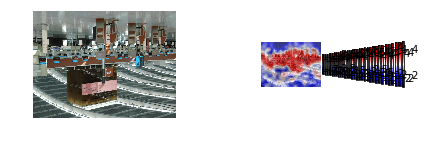

In [8]:
mm.build_meaning_map()

'/Volumes/Share/main/projects/SceneMemory01/data/meaning/rating/mat'

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Jun 21 11:29:57 2019',
 '__version__': '1.0',
 '__globals__': [],
 'smooth_meaning': array([[1.16666667, 1.16666667, 1.16666667, ..., 1.5       , 1.5       ,
         1.5       ],
        [1.16666667, 1.16666667, 1.16666667, ..., 1.5       , 1.5       ,
         1.5       ],
        [1.16666667, 1.16666667, 1.16666667, ..., 1.5       , 1.5       ,
         1.5       ],
        ...,
        [1.16666667, 1.16666667, 1.16666667, ..., 1.16666667, 1.16666667,
         1.16666667],
        [1.16666667, 1.16666667, 1.16666667, ..., 1.16666667, 1.16666667,
         1.16666667],
        [1.16666667, 1.16666667, 1.16666667, ..., 1.16666667, 1.16666667,
         1.16666667]])}

(768, 1024)

  0%|          | 0/188 [00:00<?, ?it/s]

Building meaning map for distractor_garden.mat: 100%|██████████| 188/188 [02:23<00:00,  1.31it/s]          
